<h2><a href="https://leetcode.com/problems/minimum-window-substring">76. Minimum Window Substring</a></h2><h3>Hard</h3><hr><p>Given two strings <code>s</code> and <code>t</code> of lengths <code>m</code> and <code>n</code> respectively, return <em>the <strong>minimum window</strong></em> <span data-keyword="substring-nonempty"><strong><em>substring</em></strong></span><em> of </em><code>s</code><em> such that every character in </em><code>t</code><em> (<strong>including duplicates</strong>) is included in the window</em>. If there is no such substring, return <em>the empty string </em><code>&quot;&quot;</code>.</p>

<p>The testcases will be generated such that the answer is <strong>unique</strong>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> s = &quot;ADOBECODEBANC&quot;, t = &quot;ABC&quot;
<strong>Output:</strong> &quot;BANC&quot;
<strong>Explanation:</strong> The minimum window substring &quot;BANC&quot; includes &#39;A&#39;, &#39;B&#39;, and &#39;C&#39; from string t.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> s = &quot;a&quot;, t = &quot;a&quot;
<strong>Output:</strong> &quot;a&quot;
<strong>Explanation:</strong> The entire string s is the minimum window.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> s = &quot;a&quot;, t = &quot;aa&quot;
<strong>Output:</strong> &quot;&quot;
<strong>Explanation:</strong> Both &#39;a&#39;s from t must be included in the window.
Since the largest window of s only has one &#39;a&#39;, return empty string.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == s.length</code></li>
	<li><code>n == t.length</code></li>
	<li><code>1 &lt;= m, n &lt;= 10<sup>5</sup></code></li>
	<li><code>s</code> and <code>t</code> consist of uppercase and lowercase English letters.</li>
</ul>

<p>&nbsp;</p>
<p><strong>Follow up:</strong> Could you find an algorithm that runs in <code>O(m + n)</code> time?</p>


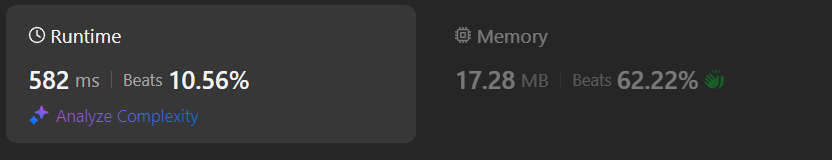

In [1]:
import math
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        start, end = 0, 0
        n = len(s) 
        freq_t, freqs = dict(), dict()
        min_window = math.inf
        minsubstr = ""

        for char in t:
            freq_t[char]  = freq_t.get(char, 0) + 1


        while end < n:
            char = s[end]
            freqs[char] = freqs.get(char, 0) + 1

            while self.match(freqs, freq_t):
                substring = s[start: end + 1]
                length = end - start + 1
                if length < min_window:
                    min_window = length
                    minsubstr = substring

                start_char = s[start]
                freqs[start_char] -= 1
                if freqs[start_char] == 0:
                    del freqs[start_char]

                start += 1

            end += 1
        return minsubstr

    def match(self, maps, mapt):
        for char in mapt:
            if maps.get(char, 0) < mapt[char]:
                return False
        return True 
